In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Combined_News_DJIA.csv");

In [3]:
print(f"Shape of data {df.shape}")

Shape of data (1989, 27)


In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
df.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
print("missing values")

df.isnull().sum()

missing values


Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [7]:
#Drop rows with Missing values

df.dropna(inplace=True)
#Check for missing values
df.isnull().sum().sum()

0

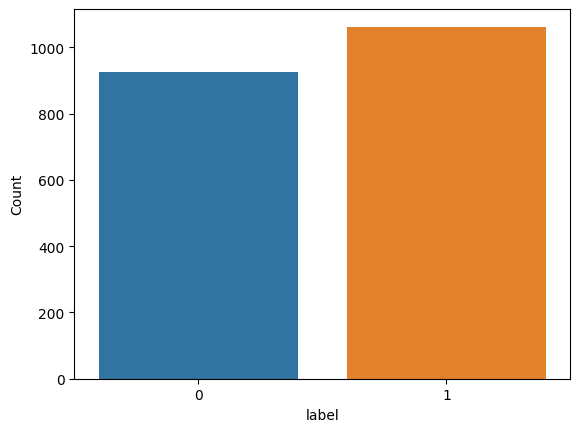

In [8]:
#Distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label',data=df)
plt.xlabel("label")
plt.ylabel('Count')
plt.show()

In [9]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
#creating a list of columns containing text
text_columns=[col for  col in df.columns if col.startswith('Top')]

#tokenize all columns and giving name col+tokenize

for col in text_columns:
  df[col+'_tokenize']=df[col].apply(word_tokenize)

df.sample(5)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16_tokenize,Top17_tokenize,Top18_tokenize,Top19_tokenize,Top20_tokenize,Top21_tokenize,Top22_tokenize,Top23_tokenize,Top24_tokenize,Top25_tokenize
1040,2012-09-24,0,"After 11 years in Guantanamo, a man who was ne...","This week, the United Nations will consider cr...",Egyptian atheist arrested on blasphemy charges...,The relaxation of cannabis laws shows the fail...,Several faith leaders across England have told...,27-Year old in Greece arrested For blaspheming...,Bo Xilai scandal: The Chinese police chief who...,The drugs don't work: a modern medical scandal,...,"[Everything, a, Chinese, family, owns, lined, ...","[New, Zealand, Prime, Minister, John, Key, has...","[More, than, 1,000, people, are, now, being, k...","[Iran, set, to, block, access, to, Google]","[Germany, Losing, Patience, With, Spain, as, E...","[North, Korea, plans, to, allow, farmers, to, ...","[Kim, Dotcom, :, New, Zealand, to, investigate...","[Outbreak, of, virus, in, SARS, family, has, W...","[Iran, :, Attack, Could, Trigger, World, War, ...","[``, When, Satire, Conquered, Iran, '', --, so..."
795,2011-10-04,1,Nobel Prize in Physics awarded to Saul Permutt...,Amanda Knox acquitted of Murder Charge!!!,UK prime minister uses the USA as an example o...,Germans want absolute ban on drink-driving,"Hugely embarrassing: Daily Mail jumps gun on ""...",Spanish fleet accused of illegal catches are r...,Libyan hospital treats an ill BBC journalist -...,Huge suicide blast kills many in Mogadishu,...,"[Japan, confirms, whaling, fleet, to, sail]","[A, history, of, religious, violence, in, Paki...","[Japan, to, Hold, Whale, Hunts, Despite, Activ...","[North, Korea, 's, Mass, Games, :, The, Pursui...","[Police, beating, peaceful, protesters, on, a,...","[Belgium, officials, ordered, to, clock, out, ...","[Al, Shabaab, bomb, kills, 65, in, Somalia]","[Water, ,, water, everywhere, but, this, islan...","[Saudi, Arabia, blames, riots, on, 'outside, f...","[Denmarks, Fatty, Foods, Tax, is, in, Effect]"
720,2011-06-17,1,"Lone man stands up to rioters in Vancouver. ""T...","Today, Saudi women defy driving ban and take t...",South Korea rejects North's demands for return...,Fukushima: It's much worse than you think,Disturbing Images of The Vancouver Riots.,Ban on 'gang culture' haircuts in school is 'i...,This photo essay of a Ukrainian interrogation ...,French burka ban descends into farce,...,"[Chinese, officials, stole, $, 120, billion, ,...","[Fatal, floods, hit, China, forcing, over, 500...","[Satellite, Pictures, Of, Chinese, Ghost, Cities]","[Vote, as, I, say, :, Independent, candidates,...","[First, Rhino, Poached, in, Swaziland, in, 20,...","[Morocco, 's, King, Mohammed, VI, has, announc...","[Syrian, people, refuse, to, back, down, to, i...","[Austerity, anger, in, Greece, threatens, the,...","[Syrian, forces, open, fire, on, protesters, ;...","[Vancouver, Looter, Turned, In, By, Parents]"
1626,2015-01-26,1,WikiLeaks demands answers after Google hands s...,Almost 500 cases of female genital mutilation ...,"Malaysia Airlines site hacked, displays 404 - ...",Mass surveillance is fundamental threat to hum...,Egyptian doctor sentenced to prison for female...,ISIS forced out of Kobane after Kurdish fighte...,Argentine journalist flees in wake of prosecut...,"Pro-Moscow rebels, backed by what NATO says is...",...,"[Abducted, Mexican, journalist, Moises, Sanche...","[Syriza, Rides, Anti-Austerity, Wave, to, Land...","[Canada, to, unveil, new, security, legislatio...","[Canadian, Public, Safety, Minister, Steven, B...","[Parents, in, Taiwan, are, now, legally, oblig...","[BBC, executive, Tarik, Kafala, :, Do, not, ca...","[Euro, tumbles, on, Greek, vote, results, ,, a...","[Journalist, who, broke, the, dead, prosecutor...","[LIVE, :, India, celebrates, its, 66th, Republ...","[Kim, Jong, Un, to, Visit, Indonesia, Marking,..."
164,2009-04-03,1,b'Newspaper in Mideastern nation photoshops wo...,"b'""People thinking about 

In [10]:
#Converting all text to lower case
df[text_columns]=df[text_columns].apply(lambda x:x.str.lower())


In [11]:
#lemmatizing words
import nltk
nltk.download('wordnet')
# Lemmatizing the words
from nltk.stem import WordNetLemmatizer

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df[text_columns] = df[text_columns].apply(lambda x: x.apply(lemmatize_words))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#removing stopwords
import nltk
from nltk.corpus import stopwords

# Download the stopwords and punkt corpora from nltk
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Create a set of English stop words
    stop_words = set(stopwords.words("english"))

    # Tokenize the input text into words
    words = nltk.word_tokenize(text)

    # Convert words to lowercase and remove stop words
    words = [word.lower() for word in words if word.lower() not in stop_words]

    # Join the words back into a single string
    return " ".join(words)


# Loop through all columns in the dataframe
for col in df.columns:
    # Check if the column data type is object
    if df[col].dtype == 'object':
        # Apply the remove_stopwords function to the column if the value is a string
        df[col] = df[col].apply(lambda x: remove_stopwords(x) if type(x) == str else x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
#removing punctuation
import string

# Define a function to remove punctuation from a string
def remove_punctuation(text):
    # Create a string of all ASCII punctuation characters
    punctuation = string.punctuation
    # Use translate method to remove all punctuation characters from the text
    text = text.translate(str.maketrans("", "", punctuation))
    return text

# Loop through all columns in the dataframe
for col in df.columns:
    # Check if the column data type is object (e.g. string)
    if df[col].dtype == 'object':
        # Apply the remove_punctuation function to each string value in the column
        df[col] = df[col].apply(lambda x: remove_punctuation(x) if type(x) == str else x)

In [14]:
#removing non textual data like url
import re

def remove_non_textual(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove special characters
    return text

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: remove_non_textual(x) if type(x) == str else x)


In [15]:
#removing words that are unique to the data set

from nltk import FreqDist

def remove_corpus_specific_words(text, threshold):
    words = nltk.word_tokenize(text)
    fdist = FreqDist(words)
    stop_words = [word for word, count in fdist.items() if count > threshold]
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: remove_corpus_specific_words(x, 100) if type(x) == str else x)

Feature Extraction

In [16]:
columns = ['Label','Top1_tokenize', 'Top2_tokenize', 'Top3_tokenize','Top4_tokenize', 'Top5_tokenize', 'Top6_tokenize', 'Top7_tokenize',           'Top8_tokenize', 'Top9_tokenize', 'Top10_tokenize',           'Top11_tokenize', 'Top12_tokenize', 'Top13_tokenize',           'Top14_tokenize', 'Top15_tokenize', 'Top16_tokenize',           'Top17_tokenize', 'Top18_tokenize', 'Top19_tokenize',           'Top20_tokenize', 'Top21_tokenize', 'Top22_tokenize',           'Top23_tokenize', 'Top24_tokenize', 'Top25_tokenize']
df_1 = df[columns]

In [17]:
#The resulting features are the TF-IDF scores for each word in the corpus.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(dataframe):
    tfidf = TfidfVectorizer(min_df=2)  # minimum document frequency to consider a word
    features = tfidf.fit_transform(dataframe)
    feature_names = tfidf.get_feature_names_out()
    return features, feature_names

# Apply TF-IDF to all columns with text data
for col in df_1.columns:
    if df_1[col].dtype == 'object':
        text = df_1[col].apply(str)  # convert pandas series to list of strings
        features, feature_names = tfidf_features(text)
        df_tfidf = pd.DataFrame(features.todense(), columns=feature_names)
        df_1 = pd.concat([df_1, df_tfidf], axis=1)

In [18]:
df_1.shape#The number of columns we get depends on the number of unique words in the text data you are transforming.

(1989, 84270)

In [19]:
# Drop all NaN values from the dataset
df_1.dropna(inplace=True)
df_1

,Label,Top1_tokenize,Top2_tokenize,Top3_tokenize,Top4_tokenize,Top5_tokenize,Top6_tokenize,Top7_tokenize,Top8_tokenize,Top9_tokenize,...,your,youth,youths,youtube,yrs,zealand,zika,zimbabwe,zionist,zone
0,0.0,"[b, '', Georgia, 'downs, two, Russian, warplan...","[b'BREAKING, :, Musharraf, to, be, impeached, ...","[b'Russia, Today, :, Columns, of, troops, roll...","[b'Russian, tanks, are, moving, towards, the, ...","[b, '', Afghan, children, raped, with, 'impuni...","[b'150, Russian, tanks, have, entered, South, ...","[b, '', Breaking, :, Georgia, invades, South, ...","[b, '', The, 'enemy, combatent, ', trials, are...","[b'Georgian, troops, retreat, from, S., Osetta...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1.0,"[b'Why, wont, America, and, Nato, help, us, ?,...","[b'Bush, puts, foot, down, on, Georgian, confl...","[b, '', Jewish, Georgian, minister, :, Thanks,...","[b'Georgian, army, flees, in, disarray, as, Ru...","[b, '', Olympic, opening, ceremony, fireworks,...","[b'What, were, the, Mossad, with, fraudulent, ...","[b'Russia, angered, by, Israeli, military, sal...","[b'An, American, citizen, living, in, S.Osseti...","[b'Welcome, To, World, War, IV, !, Now, In, Hi...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,"[b'Remember, that, adorable, 9-year-old, who, ...","[b, '', Russia, 'ends, Georgia, operation, ', '']","[b, ', '', If, we, had, no, sexual, harassment...","[b, '', Al-Qa'eda, is, losing, support, in, Ir...","[b'Ceasefire, in, Georgia, :, Putin, Outmaneuv...","[b'Why, Microsoft, and, Intel, tried, to, kill...","[b'Stratfor, :, The, Russo-Georgian, War, and,...","[b, '', I, 'm, Trying, to, Get, a, Sense, of, ...","[b, '', The, US, military, was, surprised, by,...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,"[b, ', U.S., refuses, Israel, weapons, to, att...","[b, '', When, the, president, ordered, to, att...","[b, ', Israel, clears, troops, who, killed, Re...","[b'Britain\, 's, policy, of, being, tough, on,...","[b'Body, of, 14, year, old, found, in, trunk, ...","[b'China, has, moved, 10, *, million, *, quake...","[b, '', Bush, announces, Operation, Get, All, ...","[b'Russian, forces, sink, Georgian, ships, ']","[b, '', The, commander, of, a, Navy, air, reco...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1.0,"[b'All, the, experts, admit, that, we, should,...","[b'War, in, South, Osetia, -, 89, pictures, ma...","[b'Swedish, wrestler, Ara, Abrahamian, throws,...","[b'Russia, exaggerated, the, death, toll, in, ...","[b'Missile, That, Killed, 9, Inside, Pakistan,...","[b, '', Rushdie, Condemns, Random, House, 's, ...","[b'Poland, and, US, agree, to, missle, defense...","[b'Will, the, Russians, conquer, Tblisi, ?, Be...","[b'Russia, exaggerating, South, Ossetian, deat...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,0.0,"[German, government, agrees, to, ban, fracking...","[Teenage, recruits, were, raped, by, staff, an...","[Pakistan, is, selling, nuclear, materials, to...","[Amazon, jaguar, shot, dead, at, Olympic, torc...","[Mexican, flags, raised, around, Donald, Trump...","[EU, smashes, 2020, emissions, target, six, ye...","[Police, kill, eight, striking, Mexican, teach...","[Pro-choice, activists, have, delivered, abort...","[A, French, football, fan, shoved, an, 18cm-lo...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1982,1.0,"[Today, The, United, Kingdom, decides, whether...","[E-cigarettes, should, not, be, banned, in, pu...","[Report, :, China, is, still, harvesting, orga...","[Man, opens, fire, at, cinema, complex, in, Ge...","[Erdoan, :, Europe, ,, you, dont, want, us, be...","[Asian, millionaires, now, control, more, weal...","[A, Japanese, porn, industry, association, has...","[University, students, are, being, warned, whe...","[Afghan, interpreters, 'betrayed, ', by, UK, a...",...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1983,0.0,"[David, Cameron, to, Resign, as, PM, 

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# extract the text data
text_data = df_1[['Top1_tokenize', 'Top2_tokenize', 'Top3_tokenize','Top4_tokenize', 'Top5_tokenize', 'Top6_tokenize', 'Top7_tokenize',           'Top8_tokenize', 'Top9_tokenize', 'Top10_tokenize',           'Top11_tokenize', 'Top12_tokenize', 'Top13_tokenize',           'Top14_tokenize', 'Top15_tokenize', 'Top16_tokenize',           'Top17_tokenize', 'Top18_tokenize', 'Top19_tokenize',           'Top20_tokenize', 'Top21_tokenize', 'Top22_tokenize',           'Top23_tokenize', 'Top24_tokenize', 'Top25_tokenize']]
# combine all the text data into a single string for each row
text_data = text_data.apply(lambda x: " ".join(str(x) for x in x), axis=1)

# perform count vectorization to convert text into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# extract the target variable
y = df_1["Label"]

In [21]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [22]:
train_data = X_train
train_labels = y_train
test_data = X_test
test_labels = y_test

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Define the models to be trained
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
model_names = ["Logistic Regression", "Support Vector Classifier", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Decision Tree"]

results=[]
# Train each model and get predictions
for model, model_name in zip(models, model_names):
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)

    # Calculate evaluation metrics for each model
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)

    # Store the results of each model in the results list
    results.append((model_name, accuracy, precision, recall, f1))

# Print the results
for result in results:
    print("Model: {}\nAccuracy: {:.2f}%\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF1 Score: {:.2f}%\n".format(result[0], result[1]*100, result[2]*100, result[3]*100, result[4]*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 51.39%
Precision: 54.26%
Recall: 57.08%
F1 Score: 55.63%

Model: Support Vector Classifier
Accuracy: 52.14%
Precision: 53.25%
Recall: 84.91%
F1 Score: 65.45%

Model: Random Forest
Accuracy: 55.42%
Precision: 55.93%
Recall: 77.83%
F1 Score: 65.09%

Model: Gradient Boosting
Accuracy: 49.37%
Precision: 52.11%
Recall: 64.15%
F1 Score: 57.51%

Model: K-Nearest Neighbors
Accuracy: 46.35%
Precision: 49.74%
Recall: 44.34%
F1 Score: 46.88%

Model: Decision Tree
Accuracy: 50.38%
Precision: 53.36%
Recall: 56.13%
F1 Score: 54.71%



In [24]:
# #Hyper parameter turing
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# # Initialize the SVC model
# svc = SVC()

# # Initialize the GridSearchCV object with the parameter grid and scoring metric
# grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object to the training data
# grid.fit(X_train, y_train)

# # Get the best parameters and best model from the GridSearchCV object
# best_params = grid.best_params_
# best_model = grid.best_estimator_

In [25]:
model=SVC(C= 0.1, gamma= 1, kernel= 'rbf')

In [26]:
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

In [27]:
# Calculate evaluation metrics for each model
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)


# Print the results
print(f"accuracy:  {accuracy}")
print(f"precision:  {precision}")
print(f"recall:    {recall}")
print(f"f1  :       {f1}")

accuracy:  0.5340050377833753
precision:  0.5340050377833753
recall:    1.0
f1  :       0.6962233169129721


In [28]:
X_train.shape

(1189, 34654)

In [29]:
X.shape

(1983, 34654)

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Convert labels to one-hot encoded format
num_classes = len(np.unique(y))
y_one_hot = tf.keras.utils.to_categorical(y, num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Convert sparse matrix to dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Reshape the input data
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], X_train_dense.shape[1], 1)
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], X_test_dense.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, batch_size=32, epochs=10, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test,verbose=2)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


Epoch 1/10
50/50 [==============================] - 94s 2s/step - loss: 0.7572 - accuracy: 0.5422 - val_loss: 0.6944 - val_accuracy: 0.5340
Epoch 2/10
50/50 [==============================] - 94s 2s/step - loss: 0.6478 - accuracy: 0.6255 - val_loss: 0.7315 - val_accuracy: 0.4635
Epoch 3/10
50/50 [==============================] - 92s 2s/step - loss: 0.4891 - accuracy: 0.7755 - val_loss: 0.9409 - val_accuracy: 0.5063
Epoch 4/10
50/50 [==============================] - 91s 2s/step - loss: 0.2659 - accuracy: 0.8947 - val_loss: 1.1680 - val_accuracy: 0.5038
Epoch 5/10
50/50 [==============================] - 106s 2s/step - loss: 0.1266 - accuracy: 0.9508 - val_loss: 1.3657 - val_accuracy: 0.4937
Epoch 6/10
50/50 [==============================] - 96s 2s/step - loss: 0.0716 - accuracy: 0.9754 - val_loss: 1.6700 - val_accuracy: 0.4685
Epoch 7/10
50/50 [==============================] - 97s 2s/step - loss: 0.0425 - accuracy: 0.9855 - val_loss: 2.5081 - val_accuracy: 0.4912
Epoch 8/10
50/50 [=

In [31]:
!pip install torch_geometric



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 31.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=b4b605093b927f129bc6a859d96771b6dbf035e29dd8feb1556cb7bcd59a9225
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [32]:
# !pip install torch_sparse

In [39]:
# extract the text data
df_1.reset_index(drop=True, inplace=True)
text_data = df_1[['Top1_tokenize', 'Top2_tokenize', 'Top3_tokenize','Top4_tokenize', 'Top5_tokenize', 'Top6_tokenize', 'Top7_tokenize',           'Top8_tokenize', 'Top9_tokenize', 'Top10_tokenize',           'Top11_tokenize', 'Top12_tokenize', 'Top13_tokenize',           'Top14_tokenize', 'Top15_tokenize', 'Top16_tokenize',           'Top17_tokenize', 'Top18_tokenize', 'Top19_tokenize',           'Top20_tokenize', 'Top21_tokenize', 'Top22_tokenize',           'Top23_tokenize', 'Top24_tokenize', 'Top25_tokenize']]
# combine all the text data into a single string for each row
text_data = text_data.apply(lambda x: " ".join(str(x) for x in x), axis=1)

# perform count vectorization to convert text into numerical data
vectorizer = CountVectorizer()
X_GCN = vectorizer.fit_transform(text_data)

# extract the target variable
y_GCN = df_1["Label"]

In [41]:
print(f"X shape{X_GCN.shape} and y shape {y_GCN.shape}")

X shape(1983, 34654) and y shape (1983,)


In [40]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import precision_score, r2_score



# Convert labels to tensor
y_tensor = torch.tensor(y_GCN, dtype=torch.long)

# Convert the sparse matrix to a dense matrix
X_dense = X_GCN.toarray()

# Convert the input data to a PyTorch tensor
x_tensor = torch.tensor(X_dense, dtype=torch.float)

# Create the adjacency matrix
adj_matrix = torch.eye(x_tensor.size(0))

# Convert the adjacency matrix to a sparse tensor
indices = torch.nonzero(adj_matrix, as_tuple=False).t()
values = adj_matrix[indices[0], indices[1]]
adj_tensor = torch.sparse_coo_tensor(indices, values, size=adj_matrix.size())

# Create the graph data
data = Data(x=x_tensor, edge_index=indices, y=y_tensor, adj=adj_tensor)

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, adj = data.x, data.edge_index, data.adj
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GCN model
input_dim = X_dense.shape[1]
hidden_dim = 64
output_dim = len(torch.unique(y_tensor))
model = GCN(input_dim, hidden_dim, output_dim)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Define the training function
def train(model, optimizer, criterion, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

# Train the model
for epoch in range(12):
    train(model, optimizer, criterion, data)

# Evaluate the model
model.eval()
with torch.no_grad():
    out = model(data)
    _, predicted = torch.max(out, 1)
    accuracy = (predicted == data.y).sum().item() / len(data.y)
    r2 = r2_score(data.y.numpy(), predicted.numpy())
    precision = precision_score(data.y.numpy(), predicted.numpy(), average='macro')
    print(f"Accuracy: {accuracy}")
    print(f"R2 Score: {r2}")
    print(f"Precision: {precision}")


Accuracy: 0.9722642460917801
R2 Score: 0.8885404019964926
Precision: 0.9753141831238779


In [42]:
y_tensor

tensor([0, 1, 0,  ..., 0, 0, 1])

In [43]:
type(data)

torch_geometric.data.data.Data

In [44]:
print(adj_matrix.shape)

torch.Size([1983, 1983])
